In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import netCDF4 as nc
from cartopy import crs
from cartopy.feature import NaturalEarthFeature
import wrf
 
 


##homemad


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.ticker import (NullFormatter, ScalarFormatter)
import matplotlib.dates as mdates
from netCDF4 import Dataset
from wrf import  ALL_TIMES
import matplotlib.dates as mdates

In [3]:
from matplotlib.colors import from_levels_and_colors
import cartopy.crs as ccrs
import cartopy.feature as cf
from wrf import (getvar, to_np, get_cartopy, latlon_coords, vertcross, ll_to_xy,
                 cartopy_xlim, cartopy_ylim, interpline, CoordPair, destagger, 
                 interplevel)

import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import cartopy.feature as cfe
import xarray as xr
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import glob
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

In [4]:
dir = '/bsuhome/stanleyakor/WRF-Analysis/schemes/'

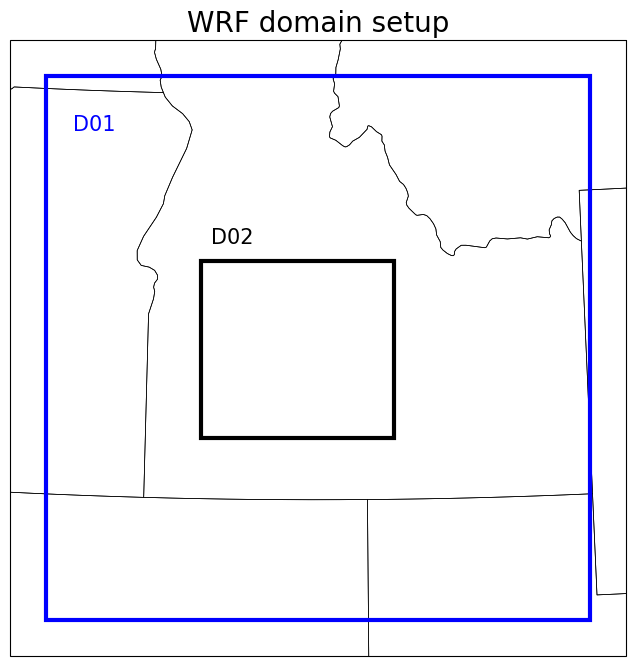

In [5]:
def get_plot_element(infile):
    rootgroup = nc.Dataset(infile, 'r')
    p = wrf.getvar(rootgroup, 'HGT')
    #lats, lons = wrf.latlon_coords(p)
    cart_proj = wrf.get_cartopy(p)
    xlim = wrf.cartopy_xlim(p)
    ylim = wrf.cartopy_ylim(p)
    rootgroup.close()
    return cart_proj, xlim, ylim
 
infile_d01 = dir + 'thompson-8/wrfinput_d01'
cart_proj, xlim_d01, ylim_d01 = get_plot_element(infile_d01)
 
infile_d02 = dir + 'thompson-8/wrfout_d02_2023-01-05_00:00:00'
_, xlim_d02, ylim_d02 = get_plot_element(infile_d02)
 
# infile_d03 = 'domain_plot/wrfout_d03.2010-05-01_00:00:00.nc'
# _, xlim_d03, ylim_d03 = get_plot_element(infile_d03)
 
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=cart_proj)
states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                             name="admin_1_states_provinces")
ax.add_feature(states, linewidth=0.5)
ax.coastlines('50m', linewidth=0.8)
 
# d01
ax.set_xlim([xlim_d01[0]-(xlim_d01[1]-xlim_d01[0])/15, xlim_d01[1]+(xlim_d01[1]-xlim_d01[0])/15])
ax.set_ylim([ylim_d01[0]-(ylim_d01[1]-ylim_d01[0])/15, ylim_d01[1]+(ylim_d01[1]-ylim_d01[0])/15])
 
# d01 box
ax.add_patch(mpl.patches.Rectangle((xlim_d01[0], ylim_d01[0]), xlim_d01[1]-xlim_d01[0], ylim_d01[1]-ylim_d01[0],
             fill=None, lw=3, edgecolor='blue', zorder=10))
ax.text(xlim_d01[0]+(xlim_d01[1]-xlim_d01[0])*0.05, ylim_d01[0]+(ylim_d01[1]-ylim_d01[0])*0.9, 'D01',
        size=15, color='blue', zorder=10)
 
#d02 box
ax.add_patch(mpl.patches.Rectangle((xlim_d02[0], ylim_d02[0]), xlim_d02[1]-xlim_d02[0], ylim_d02[1]-ylim_d02[0],
             fill=None, lw=3, edgecolor='black', zorder=10))
ax.text(xlim_d02[0]+(xlim_d02[1]-xlim_d02[0])*0.05, ylim_d02[0]+(ylim_d02[1]-ylim_d02[0])*1.1, 'D02',
        size=15, color='black', zorder=10)
 
# d03 box
# ax.add_patch(mpl.patches.Rectangle((xlim_d03[0], ylim_d03[0]), xlim_d03[1]-xlim_d03[0], ylim_d03[1]-ylim_d03[0],
#              fill=None, lw=3, edgecolor='red', zorder=10))
# ax.text(xlim_d03[0]+(xlim_d03[1]-xlim_d03[0])*0.1, ylim_d03[0]+(ylim_d03[1]-ylim_d03[0])*0.8, 'D03',
#         size=15, color='red', zorder=10)
 
ax.set_title('WRF domain setup', size=20)
 
plt.show()
fig.savefig('WRF_domain_pywrf.big.png', dpi=600)

In [6]:
def get_res(path, variable):
    # Get a list of wrfout files in the directory
    wrf_files = sorted(glob.glob(dir_thomp + '/wrfout_d02*'))
    
    wrf_in = []
    for file in wrf_files:
        wrf_in.append(Dataset(file))

    outp = getvar(wrf_in, variable, timeidx=ALL_TIMES, method="cat")
    return outp

In [7]:
%%bash
cd /bsuhome/stanleyakor/WRF-Analysis/schemes/
ls

milbrandt-9
thompson-8
wsm5-4
wsm6-6


In [8]:
%%bash 
module load nco/4.9.3

## FILES

In [23]:
import glob
import subprocess
import os
import shutil

# Specify the directory path containing the wrfout files
dir = '/bsuhome/stanleyakor/WRF-Analysis/schemes/'

dir_thomp = dir + 'thompson-8'
dir_wsm5 = dir + 'wsm5-4'
dir_wsm6 = dir + 'wsm6-6'
dir_milb8 = dir + 'milbrandt-9'

# DIR = [dir_thomp, dir_wsm5, dir_wsm6, dir_milb8]
# Name = ["thompson", "wsm5", "wsm6" , "milbrandt"]

DIR = [dir_thomp]
Name = ["thompson"]

variable_list = "SNOWH,RAINNC,T2,P,HGT"

for dir, name in zip(DIR, Name):
    # Specify the directory path containing the wrfout files
    directory = dir

    sorted_files = sorted(glob.glob(directory + '/wrfout_d02*'))

    file_name = name + '_concate.nc'
    try:
        # Concatenate the sorted files using ncecat
        subprocess.run(["ncrcat"] + sorted_files + ["-O", file_name])
    except Exception as e:
        print(e)

    if variable_list:
        file_name2 = name + "_sliced.nc"


        command = f"ncks -v {variable_list} {file_name} -O {file_name2}"
        
        # Execute the command
        
        try:
           subprocess.run(command, shell=True)
            
        except Exception as e:
            print(e)

        os.remove(file_name)

    # Move the files to the right directory
    shutil.move(file_name2, dir)


In [24]:
dir_thomp

'/bsuhome/stanleyakor/WRF-Analysis/schemes/thompson-8'

In [ ]:
th_rainnc = get_res(dir_thomp, "SNOWH")
th_wsm6 = get_res(dir_wsm6, "SNOWH")
th_wsm5 = get_res(dir_wsm5,"SNOWH")
th_mil = get_res(dir_milb8,"SNOWH")

In [42]:

lat1 = 43.64792811
lat2 = -115.9897596
lon1 = -116.0
lon2 = -116.0

In [43]:
wrfin = Dataset(dir_thomp +'/wrfout_d02_2023-01-06_00:00:00')

In [44]:
x1, y1 = to_np(ll_to_xy(wrfin, lat1, lon1))
#x2, y2 = to_np(ll_to_xy(th_rainnc, lat2, lon2))

        

In [45]:
rainnc_th = th_rainnc.sel(south_north=y1, west_east=x1)
wsm5_th = th_wsm5.sel(south_north=y1, west_east=x1)
wsm6_th= th_wsm6.sel(south_north=y1, west_east=x1)
mil_th = th_mil.sel(south_north=y1, west_east=x1)

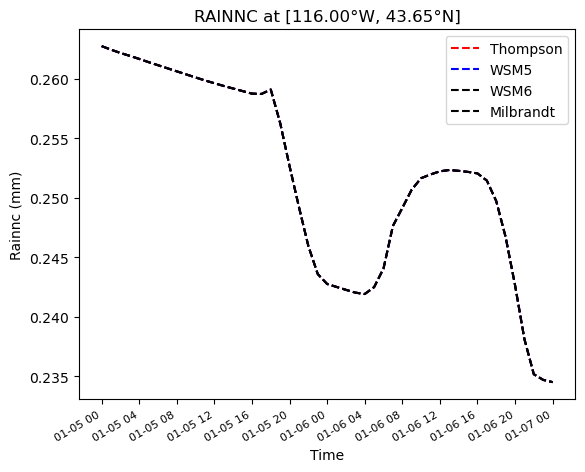

In [46]:
# Plot the line
rainnc_th.plot.line('--', color='red',label='Thompson')
wsm5_th.plot.line('--', color='blue', label='WSM5')
wsm6_th.plot.line('--', color='black', label='WSM6')
mil_th.plot.line('--', color='black', label='Milbrandt')
# Customize x-axis labels

plt.xlabel('Time')
plt.ylabel('Rainnc (mm)')

# # Set the y-axis limits
# plt.ylim(p.min() - 10,p.max() + 10)  # Example limits, adjust as needed

# Add legend
plt.legend()
# Add titles
ax = plt.gca()
ax.tick_params(axis='x', labelsize=8)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=4))
plt.title("RAINNC at [{:.2f}°{}, {:.2f}°{}]".format(abs(lon1),\
        "W" if lon1 < 0 else "E", abs(lat1), "S" if lat1 < 0 else "N"))
plt.show()

## SPATIAL

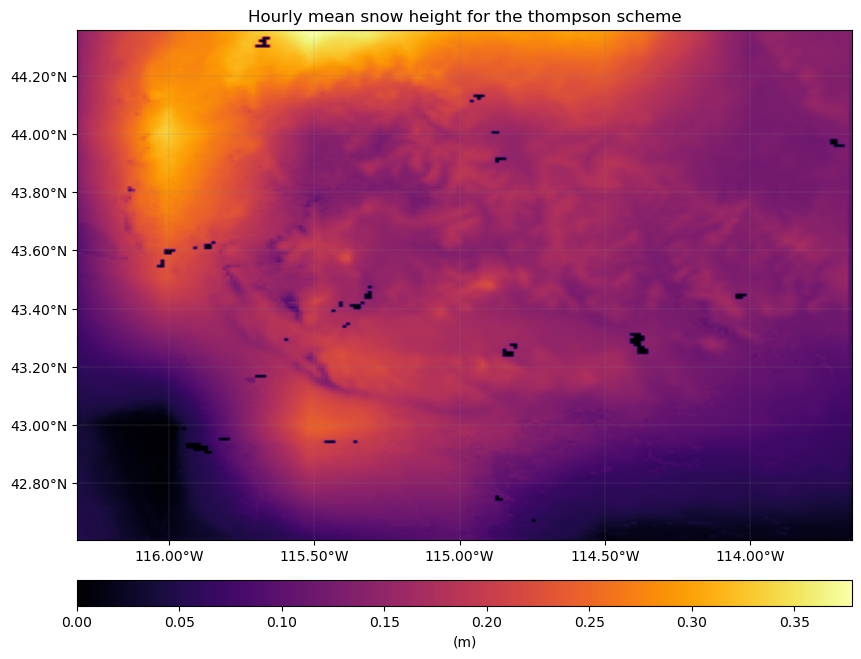

In [60]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import xarray as xr

# Open the wrfout file
file = dir_thomp + "/thompson_sliced.nc"
wrf_data = xr.open_dataset(file)

variable = "SNOWH"
tit = "Hourly mean snow height for the thompson scheme"

# Compute hourly mean snow height
snowh = wrf_data[variable].mean(dim="Time")

# Extract latitude and longitude dimensions
lat = wrf_data['XLAT'].isel(Time=0)
lon = wrf_data['XLONG'].isel(Time=0)

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(snowh, extent=(lon.min(), lon.max(), lat.min(), lat.max()), cmap='inferno', origin='lower', alpha=1.0)

plt.title(tit)

# Modify latitude and longitude labels
lon_ticks = ax.get_xticks()
lat_ticks = ax.get_yticks()
lon_labels = [f'{abs(lon):.2f}°{"W" if lon < 0 else "E"}' for lon in lon_ticks]
lat_labels = [f'{abs(lat):.2f}°{"S" if lat < 0 else "N"}' for lat in lat_ticks]
ax.set_xticklabels(lon_labels)
ax.set_yticklabels(lat_labels)

# Add gridlines
ax.grid(color='gray', linestyle='--', linewidth=0.2)

unit = "(m)"
# Create a colorbar with the same width as the plot
divider = make_axes_locatable(ax)
cax = divider.append_axes('bottom', size='5%', pad=0.4)
plt.colorbar(im, cax=cax, orientation='horizontal', label="(m)")

# Save the plot to a file
#plt.savefig('rainnc_plot.pdf', dpi=300)

# Display the plot
plt.show()


In [ ]:
# time_mean =elevation.mean(dim='Time')
wrf_data[variabale].mean(dim = "Time")
plt.imshow(wrf_data[variabale].mean(dim = "Time"))